In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime

In [37]:
# import results
pats = pd.read_csv("pats_results_2017.csv", encoding='utf-8')
jax = pd.read_csv("jax_results_2017.csv", encoding='utf-8')

In [38]:
# change datatype of columns
pats[['Week', 'TotYdO', 'TotYdD']] = pats[['Week', 'TotYdO', 'TotYdD']].apply(pd.to_numeric, errors='coerce')
jax[['Week', 'TotYdO', 'TotYdD']] = jax[['Week', 'TotYdO', 'TotYdD']].apply(pd.to_numeric, errors='coerce')

In [39]:
# fill nan with 0 for columns we care
pats = pats.fillna({'TotYdD':0, 'TotYdO': 0})
jax = jax.fillna({'TotYdD':0, 'TotYdO': 0})

In [40]:
# create two axes, one on top, one on bottom
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_dpi(100)

In [41]:
ax1.set_title("Pats and Jax 2017 \n(Total Offense and Defense)")
xvals = range(1, int(pats[['Week']].max())+1)

In [42]:
# define axis 1
ax1.plot(pats[['Week']], pats[['TotYdO']], 'b-', label='Pats' )
ax1.plot(pats[['Week']], jax[['TotYdO']], 'b:' , label='Jax')
ax1.set_ylabel('Total Yards Offense', color='b')
ax1.axhline(y=int(pats.replace(0,np.NaN)[['TotYdO']].mean()), color='g', linestyle='-')
ax1.axhline(y=int(jax.replace(0,np.NaN)[['TotYdO']].mean()), color='g', linestyle=':')
ax1.tick_params('y', colors='b')
ax1.set_xticks(xvals)
ax1.legend(bbox_to_anchor=(.7, .75), ncol=2)

In [43]:
# define axis 2
ax2.plot(pats[['Week']], pats[['TotYdD']], 'r-', label='Pats')
ax2.plot(pats[['Week']], jax[['TotYdD']], 'r:', label='Jax')
ax2.axhline(y=int(pats.replace(0,np.NaN)[['TotYdD']].mean()), color='g', linestyle='-')
ax2.axhline(y=int(jax.replace(0,np.NaN)[['TotYdD']].mean()), color='g', linestyle=':')
ax2.tick_params('y', colors='r')
ax2.set_ylabel('Total Yards Defense', color='r')
ax2.set_xticks(xvals)
ax2.legend(bbox_to_anchor=(.65, .8), ncol=2)

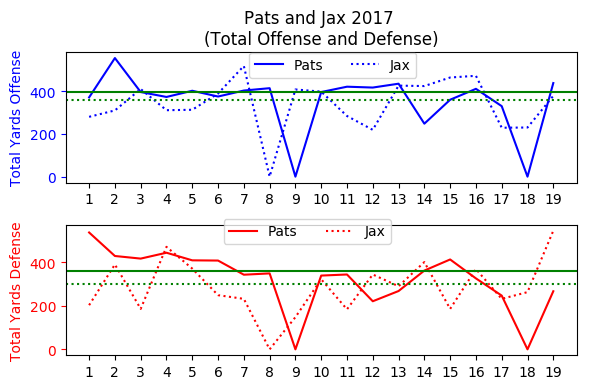

In [44]:
plt.tight_layout()
plt.show()